In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
 
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
 
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 


 

169009152/169001437 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


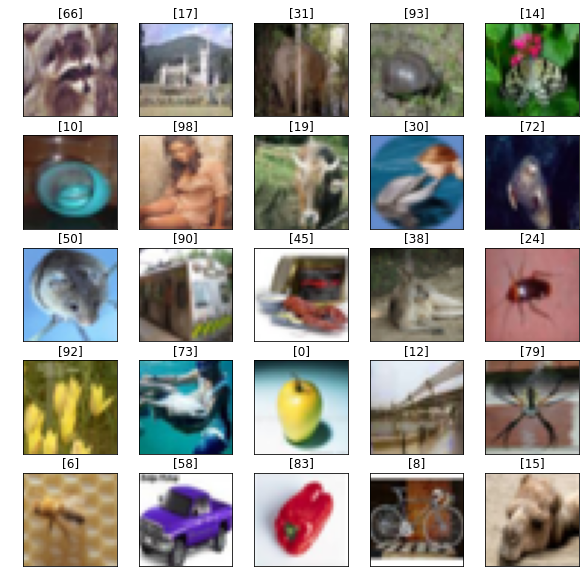

In [ ]:

plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.title(y_train[rand_num])
 
plt.show()

In [ ]:
# parameters for data
height = 224
width = 224
channels = 3
input_shape = (height, width, channels)
n_classes = 100

# parameters for optimizers
lr = 1e-3

# Parameters for training
epochs = 25
batch_size = 8

# parameters for callback functions
es_patience = 10
rlrop_patience = 5
decay_rate = 0.5

In [15]:
(X, y), (X_test, y_test) = cifar100.load_data()

print("The shape of X_train : ", X.shape)
print("The shape of X_test : ", X_test.shape)


The shape of X_train :  (50000, 32, 32, 3)
The shape of X_test :  (10000, 32, 32, 3)


In [19]:
fine_label_list =  ['airplane', 'aquarium_fish', 'banana', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
                    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
                    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
                    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
                    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'palm', 'plate', 'poppy', 'porcupine', 'possum', 
                    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
                    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
                    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

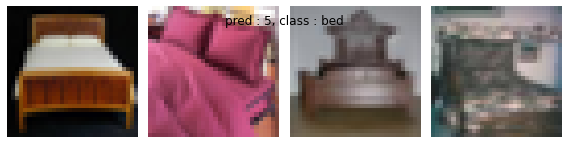

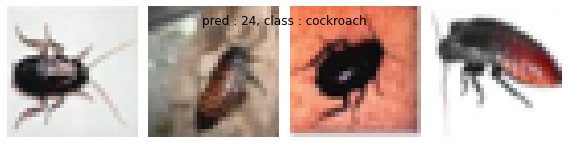

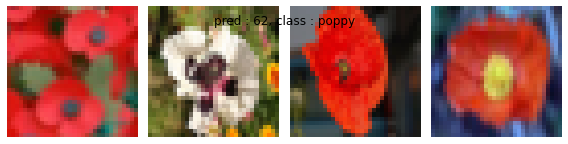

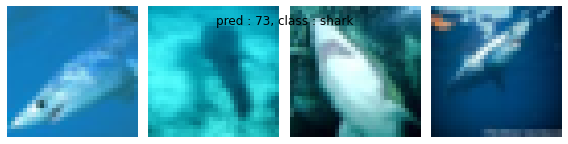

In [24]:
class_plotted = np.random.choice(range(n_classes), 4, replace = False)
for i in range(len(class_plotted)):
    image_samples = X[y.reshape(-1) == class_plotted[i]][:5]
    fig, ax = plt.subplots(nrows = 1, ncols = 4,figsize = (8,8))
    fig.suptitle("pred : %d, class : %s" % (class_plotted[i], fine_label_list[class_plotted[i]]), y = .6)
    for j in range(4):
        ax[j].imshow(image_samples[j])
        ax[j].axis('off')  
    fig.tight_layout()
plt.show()

In [23]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
 
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
 
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
 
model = Sequential()
 
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))
 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
model.summary()
 
model.fit(x_train, y_train, epochs=50, batch_size=128, verbose=1)
 
json_string = model.to_json()
open('cifar100_cnn.json',"w").write(json_string)
 
model.save_weights('cifar100_cnn.h5')
 
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


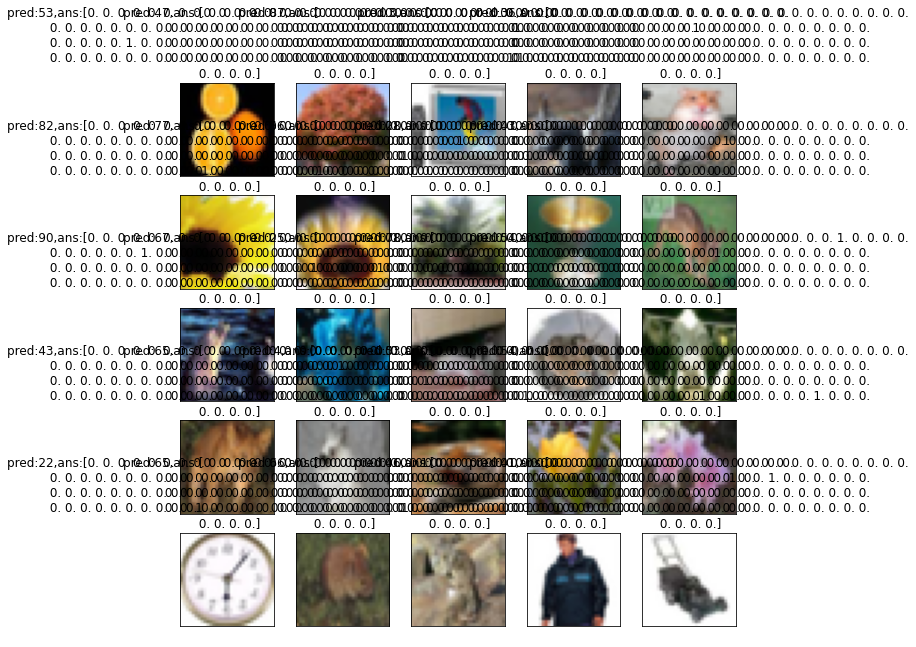

In [25]:
img_pred = model.predict_classes(x_test)
 
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test[rand_num])
  
    plt.xticks(color="None")
    plt.yticks(color="None")
  
    plt.tick_params(length=0)
  
    plt.title('pred:{0},ans:{1}'.format(img_pred[rand_num],y_test[rand_num]))
 
plt.show()


predict_classes = [40]


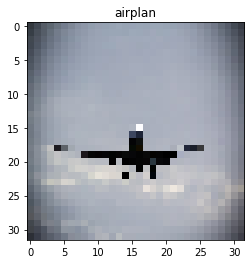


predict_classes = [6]


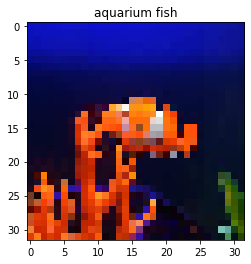


predict_classes = [83]


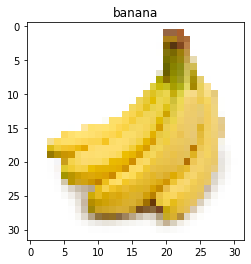


predict_classes = [48]


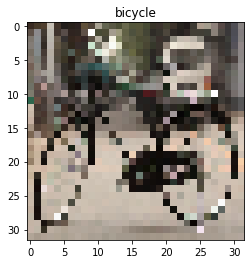


predict_classes = [88]


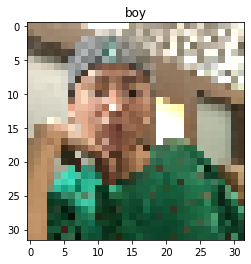


predict_classes = [48]


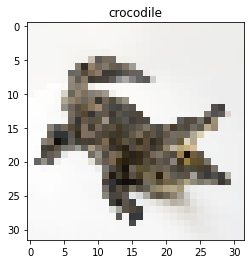


predict_classes = [7]


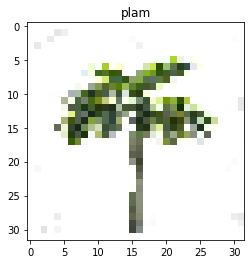


predict_classes = [42]


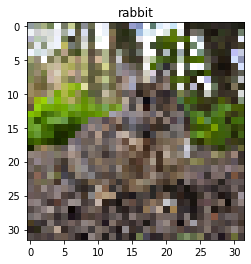


predict_classes = [7]


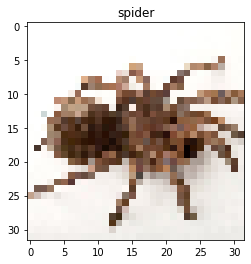


predict_classes = [82]


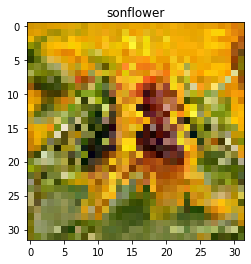


predict_classes = [87]


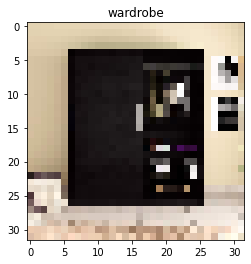

In [30]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
import glob
 
files = glob.glob("/content/drive/My Drive/cifar100_sample/*")
 
for i in files:
  
  temp_img=load_img(i, target_size=(32,32))
   

  temp_img_array=img_to_array(temp_img)
  temp_img_array=temp_img_array.astype('float32')/255.0
  temp_img_array=temp_img_array.reshape((1,32,32,3))
   
  
  img_pred=model.predict_classes(temp_img_array)
  print('\npredict_classes =',img_pred)
  plt.imshow(temp_img)
  plt.title(i.replace('/content/drive/My Drive/cifar100_sample/', '').replace('.jpg', ''))
  plt.show()
